<a href="https://colab.research.google.com/github/OsbornOuO/ml_virtual_currency/blob/main/04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install finlab_crypto > log.txt
!pip install talib-binary > log.txt

In [ ]:
import finlab_crypto

finlab_crypto.setup()
ohlcv = finlab_crypto.crawler.get_all_binance("BTCUSDT",'1h')

All caught up..!


# MACD Strategy

In [ ]:
import talib

help(talib.MACD)


Help on function MACD in module talib._ta_lib:

MACD(...)
    MACD(real[, fastperiod=?, slowperiod=?, signalperiod=?])
    
    Moving Average Convergence/Divergence (Momentum Indicators)
    
    Inputs:
        real: (any ndarray)
    Parameters:
        fastperiod: 12
        slowperiod: 26
        signalperiod: 9
    Outputs:
        macd
        macdsignal
        macdhist



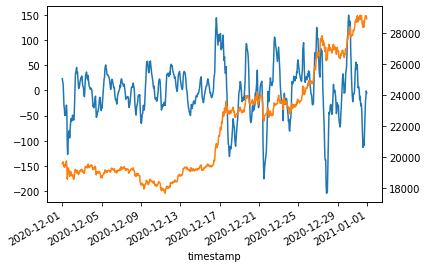

In [ ]:
macdhist = talib.MACD(ohlcv.close)[2]

macdhist.loc['2020-12'].plot()
ohlcv.close.loc['2020-12'].plot(secondary_y = True)

In [ ]:
# talib.get_functions()

In [ ]:
import numbers
from finlab_crypto import Strategy

def crossover(s1,s2):
  if isinstance(s2, numbers.Number):
    return (s1 > s2) & (s1.shift() < s2)
  return (s1 > s2) & (s1.Shift() < s2.shift())
def crossunder(s1,s2):
  if isinstance(s2,numbers.Number):
    return (s1 < s2 ) & (s1.shift() > s2)
  return (s1 < s2) & (s1.shift() > s2.shift())

# macd strategy
@Strategy(fastperiod=12,slowperiod=26,signalperiod=9)
def macd_strategy(ohlcv):
  macdhist = talib.MACD(ohlcv.close,
                        fastperiod=macd_strategy.fastperiod,
                        slowperiod=macd_strategy.slowperiod,
                        signalperiod=macd_strategy.signalperiod)[2]
  entries = crossover(macdhist,0)
  exits = crossunder(macdhist,0)

  figures = {
      'figures':{
          'macdhist':macdhist
      }
  }

  return entries,exits,figures
  # entries
  # exits

macd_strategy.backtest(ohlcv,variables=None,freq='1h',plot=True)

In [ ]:
from finlab_crypto.talib_strategy import TalibStrategy

macd_strategy = TalibStrategy('MACD',
                              lambda ohlcv,macd: crossover(macd.macdhist,0),
                              lambda ohlcv,macd: crossunder(macd.macdhist,0)
                              )


# rsi_strategy = TalibStrategy('RSI',
#                              lambda ohlcv,rsi: resi > 50,
#                              lambda ohlcv,rsi: resi < 50
#                              )

macd_strategy.backtest(ohlcv,variables=None,freq='1h',plot=True)